In [1]:
import natsort
import af2rave.spib as af2spib
from af2rave import Colvar

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

import glob

matplotlib.rcParams.update({"text.usetex": True, 
                            "font.family": "sans-serif",
                            "figure.dpi": 300,
                            "legend.frameon": False})

In [2]:
model = af2spib.SPIBResult.from_file("dt_10000.pickle")
print("Converged States:", model.n_converged_states)

Converged States: 4


<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_2384010/926109104.py:4: SyntaxWarning: invalid escape sequence '\D'
  ax.set_title("$\Delta$t = 10 ns")


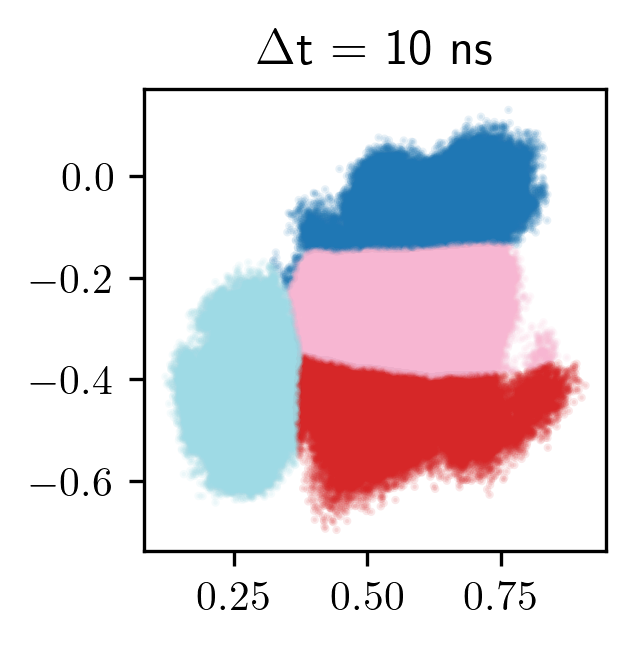

In [3]:
fig, ax = plt.subplots(figsize=(2, 2))

ax.set_box_aspect(1)
ax.set_title("$\Delta$t = 10 ns")
ax.scatter(*model.get_latent_representation()[:,], 
           c=model.get_state_label(), 
           s=1, alpha=0.1, cmap="tab20", rasterized=True)

/home/dateng/Project/af2rave/af2rave/spib/spib_result.py:281: RuntimeWarning: divide by zero encountered in log
  f = -np.log(h)


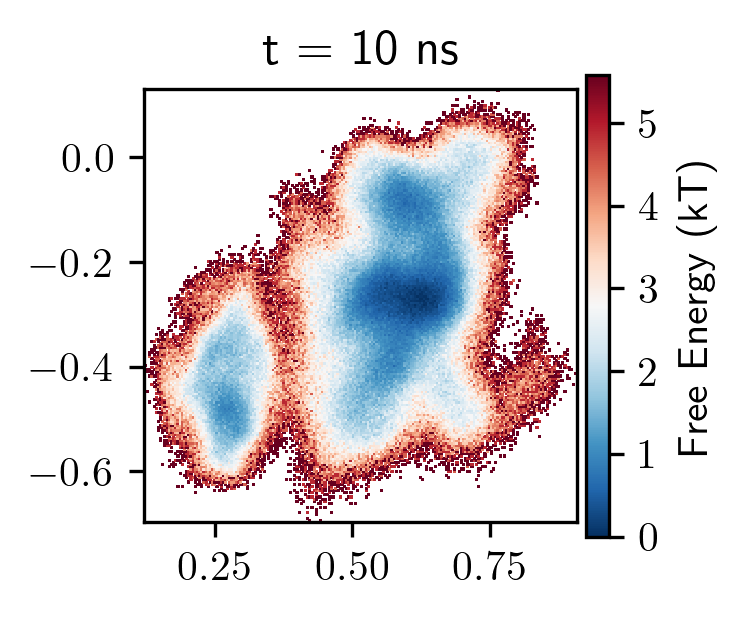

In [4]:
fig, ax = plt.subplots(figsize=(2, 2) )

ax.set_box_aspect(1)
ax.set_title("t = 10 ns")
cbar = ax.pcolor(*model.get_free_energy(), cmap="RdBu_r", rasterized=True)

cbar = fig.colorbar(cbar, ax=ax, location='right', fraction=0.05, pad=0.02)
# fig.colorbar(cbar, orientation='vertical', cax=cb_ax)
cbar.set_label("Free Energy (kT)", loc="center")
cbar.ax.yaxis.set_major_locator(MultipleLocator(1))

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_2384010/2619626169.py:3: SyntaxWarning: invalid escape sequence '\D'
  ax.set_title("$\Delta$t = 10 ns")


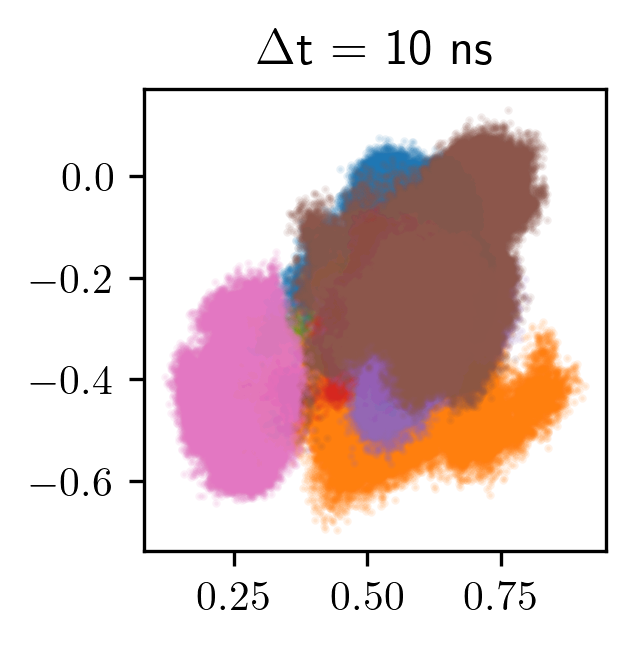

In [5]:
fig, ax = plt.subplots(figsize=(2, 2))

ax.set_title("$\Delta$t = 10 ns")
ax.set_box_aspect(1)
for n in np.arange(model.n_traj):
    ax.scatter(*model.get_latent_representation(n), c=f"C{n}", s=1, alpha=0.1, rasterized=True)

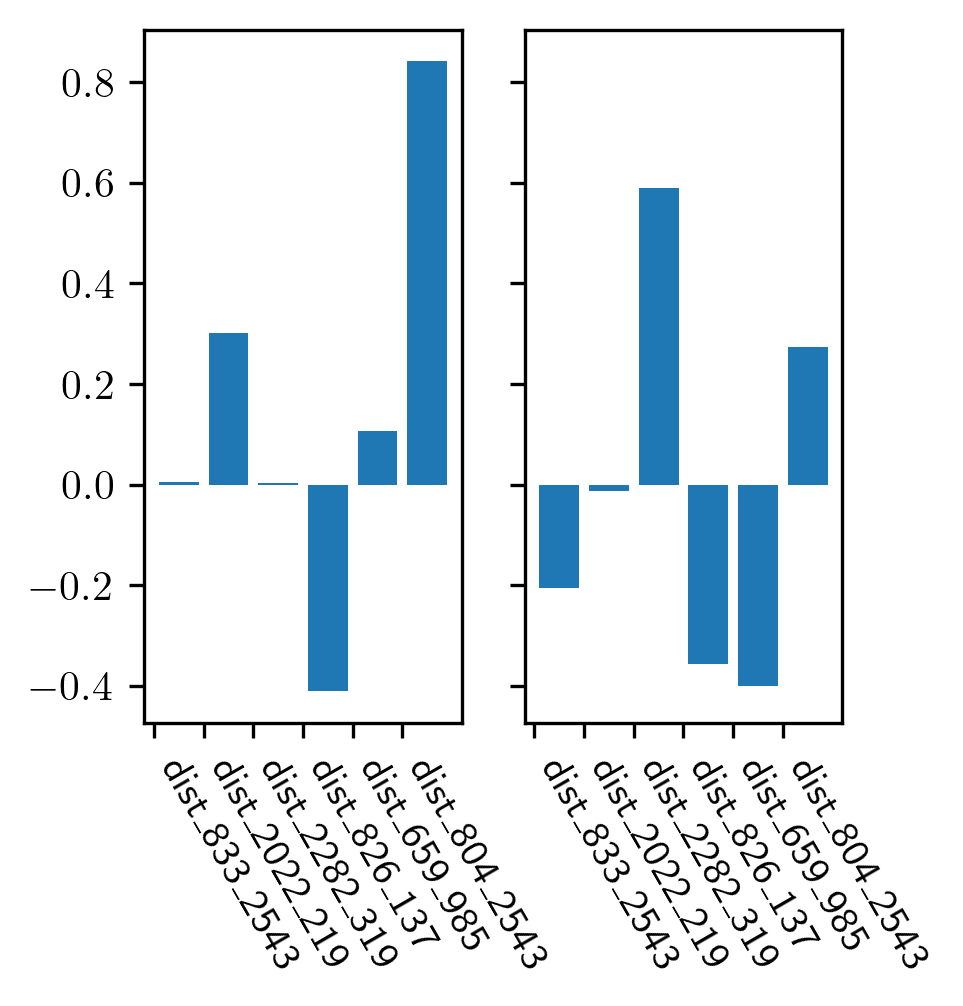

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(3,3), sharex=True, sharey=True)

header = ["dist_833_2543",
          "dist_2022_219", 
          "dist_2282_319", 
          "dist_826_137", 
          "dist_659_985", 
          "dist_804_2543"
        ]
for i, ax in enumerate(axes):
    bars = ax.bar(np.arange(len(header)), model.weight[i].flatten())
    _ = ax.xaxis.set_ticks(np.arange(len(header)) - 0.5, header, rotation=-60, ha="left")
